In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esigning-of-loanbased-on-financial-history/Financial-Data.csv


In [2]:
data  = pd.read_csv("/kaggle/input/esigning-of-loanbased-on-financial-history/Financial-Data.csv")
data.head(5)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
data.shape

(17908, 21)

In [4]:
data.size

376068

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [6]:
data.select_dtypes(include = 'object').columns

Index(['pay_schedule'], dtype='object')

In [7]:
data  = pd.get_dummies(data, drop_first = True)
data.head(5)

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,False,False,False
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,False,True,False


In [8]:
data.isnull().values.any()

False

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [10]:
zero_count = data['e_signed'].value_counts()
print(zero_count)

e_signed
1    9639
0    8269
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


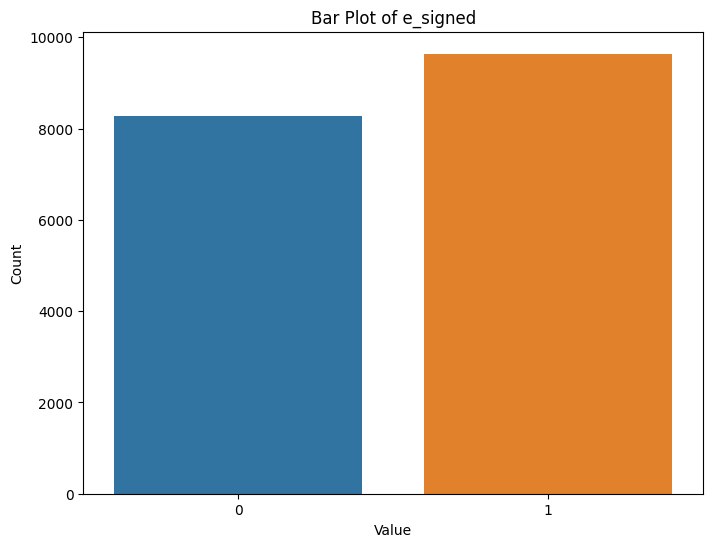

In [11]:
# Count the number of 0's and 1's in e_signed
zero_count = data['e_signed'].value_counts()[0]
one_count = data['e_signed'].value_counts()[1]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['0', '1'], y=[zero_count, one_count])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Bar Plot of e_signed')
plt.show()

In [12]:
data["Total_months_employed"] = (data["months_employed"]+data["years_employed"]*12)
data.head(3)

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,Total_months_employed
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False,36
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True,72
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True,6


In [13]:
data = data.drop(['months_employed','years_employed'], axis = 'columns')
data.head(2)

,Entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,Total_months_employed
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False,36
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True,72


In [14]:
data1 = data.drop('e_signed', axis = 'columns')

<Axes: title={'center': 'Correlation of features with e_signed'}>

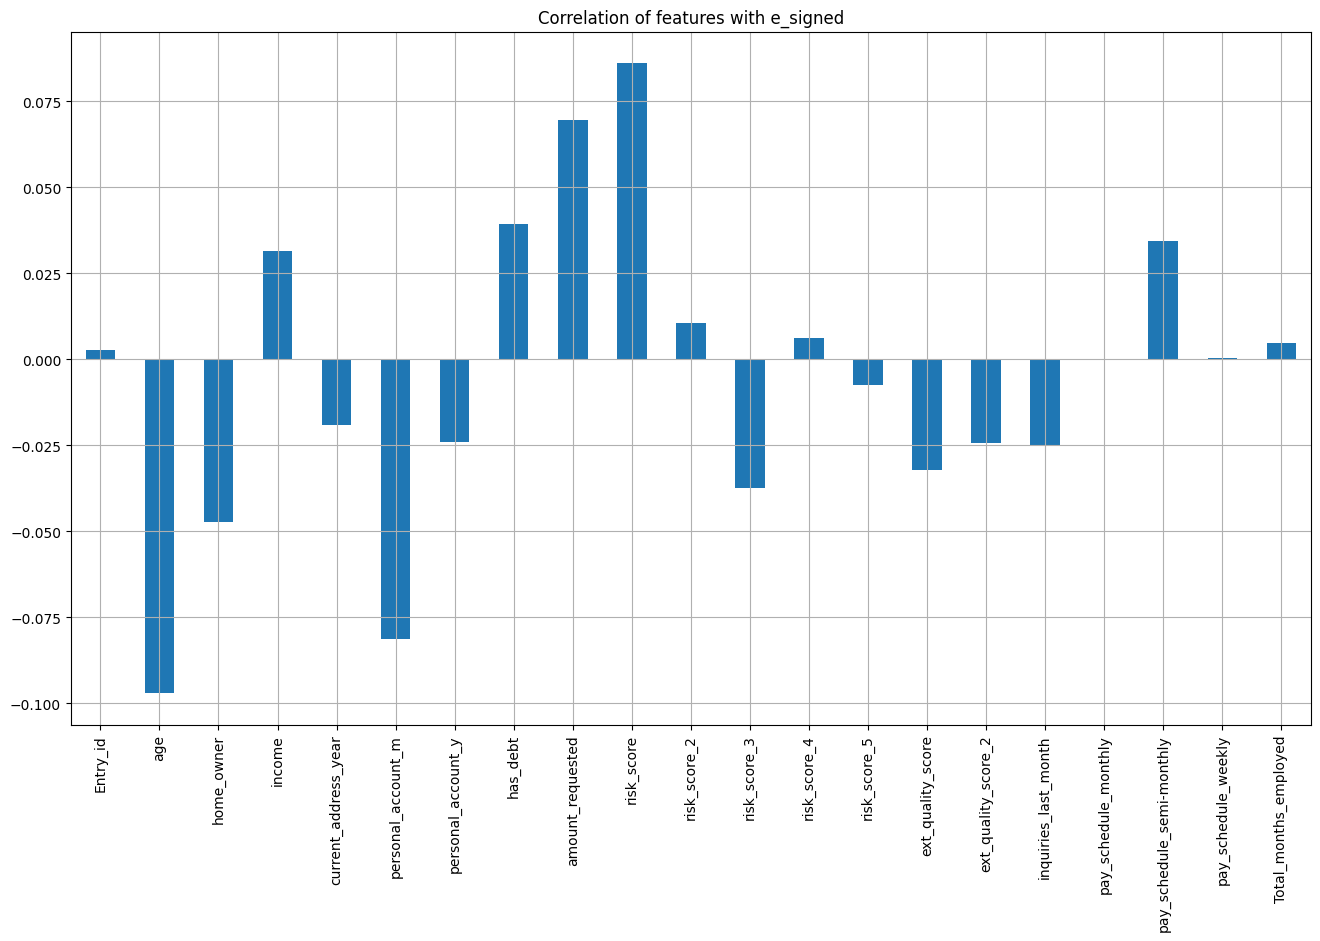

In [15]:
data1.corrwith(data['e_signed']).plot.bar(figsize = (16,9), title = "Correlation of features with e_signed", grid = True)

In [16]:
corr = data.corr()

<Axes: >

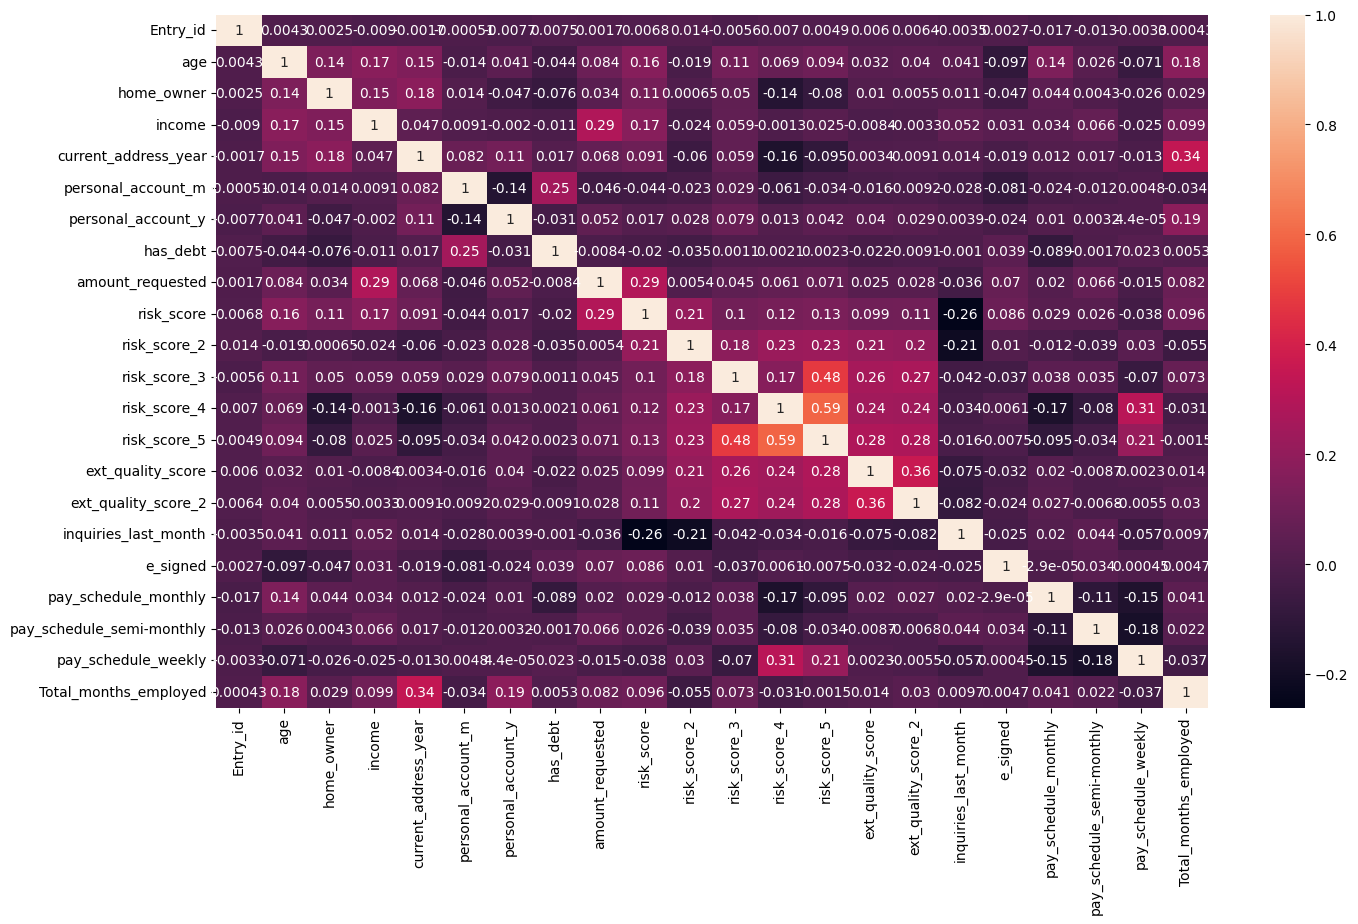

In [17]:
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot = True)

In [18]:
X = data.drop("e_signed", axis = 'columns')
y = data["e_signed"]

In [19]:
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,mean_squared_error,mean_absolute_error,r2_score

In [24]:
# Calculate the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
# Create a dictionary to store the scores
scores = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "MSE", "MAE", "R2"],
    "Score": [accuracy, precision, recall, f1, mse, mae, r2]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(scores)

# Display the DataFrame
print(df)

      Metric     Score
0   Accuracy  0.575098
1  Precision  0.589161
2     Recall  0.698446
3   F1 Score  0.639165
4        MSE  0.424902
5        MAE  0.424902
6         R2 -0.709909


In [26]:
from sklearn.svm import SVC
# Create an SVM model
svm = SVC(kernel='linear', C=1)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5784477945281965


In [27]:
svm = SVC(kernel='rbf', gamma=0.1)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6077610273590173


**We can use GridSearchCV to perform a grid search over different hyperparameters to find the best combination.**

In [28]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'gamma': [0.1, 0.5, 1]
# }

# grid_search = GridSearchCV(svm, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

**To optimize the logistic regression model**

Hyperparameter Tuning: Logistic regression has several hyperparameters that can be tuned to improve its performance. Some common hyperparameters are C (inverse of regularization strength), penalty (L1 or L2 regularization), and max_iter (maximum number of iterations). You can use GridSearchCV.

In [29]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'max_iter': [500, 1000]
# }

# grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6273031825795645


**GridSearchCV to perform a grid search over different hyperparameters to find the best combination.**

In [31]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'max_depth': [None, 5, 10]
# }

# grid_search = GridSearchCV(rf, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)